In [2]:
from SingleSphereMiePy import bhmie

0
[array([0., 0.]), array([0.015     , 0.03708099]), array([-0.015     , -0.03708099]), array([-0.015     , -0.03708099]), array([0.015     , 0.03708099]), array([0.03      , 0.07416198]), array([-0.03      , -0.07416198]), array([-0.03      , -0.07416198]), array([0.03      , 0.07416198]), array([0.045     , 0.11124298]), array([-0.045     , -0.11124298]), array([-0.045     , -0.11124298]), array([0.045     , 0.11124298]), array([0.06      , 0.14832397]), array([-0.06      , -0.14832397]), array([-0.06      , -0.14832397]), array([0.06      , 0.14832397]), array([0.075     , 0.18540496]), array([-0.075     , -0.18540496]), array([-0.075     , -0.18540496]), array([0.075     , 0.18540496]), array([0.09      , 0.22248595]), array([-0.09      , -0.22248595]), array([-0.09      , -0.22248595]), array([0.09      , 0.22248595]), array([-0.03708099,  0.015     ]), array([-0.03708099,  0.015     ]), array([ 0.03708099, -0.015     ]), array([ 0.03708099, -0.015     ]), array([-0.02208099,  0.0

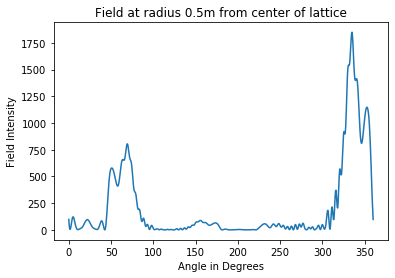

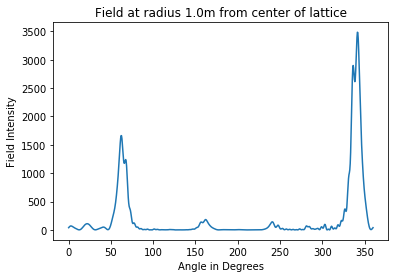

In [6]:
from numpy import *
import matplotlib.pyplot as plt


#physical setup should be as follows
#emitter is at x=0 and the middle of the lattice should be at x=0. Not implementing emitter distance
#from lattice as we should follow functional form for the intensity fall off to determine initial
#field strength
#all units in meters
pii = 4.*arctan(1.)#done in the miepy code so we will use it but I dont like it.
radius = .005#sphere radius
lamda = .03
k = 2*pii / lamda
x = 2*3.14159265*radius*1/lamda

z=0#assuming the level plane


refrel = 2.75681

#The following code will create an array of field data for each sphere for the specified number of
#a from center of lattice and angles to measure around the lattice this code
#will convert each distance and angle into distances and angles relative to the position of each given sphere
#sphere. That is, for every radius and angle given each sphere will have their own angle and radius
a = radius #spheres radius, all spheres should be same radius though it is not a hard fix


#TODO is this correct
#place emitter at 1 unit away down y axis
r_e = [0,-1]





#for specific lambda and d find theta and create crystal from there


d = .04
braggO = arcsin(lamda/(2*d))

pltLine = 2*braggO


parallelB =  multiply([sin(braggO),cos(braggO)],d)
perpB = array([-parallelB[1],parallelB[0]])

orig = [0.0,0.0]
#these are the x and y positions of the spheres relative to the middle of the "line"
r_sp = [array(orig)]



rows = 7
cols = 2
for col in range(0,cols):
    for row in range(0,rows):
        if (col == 0 and row == 0):
            print(row)
            continue
        cs = add(orig,multiply(row,parallelB))
        cs = add(cs,multiply(col,perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,-parallelB))
        cs = add(cs,multiply(col,perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,-parallelB))
        cs = add(cs,multiply(col,-perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,parallelB))
        cs = add(cs,multiply(col,-perpB))
        r_sp.append(cs)

#end adding multiple rows of spehres    
                    
numSpheres = len(r_sp)
print(r_sp)
print("num spheres :" + str(numSpheres))



#list of detector radius' from the center of the spheres
#never have r = 0
step = .5
detectR = arange(0.5,1.5, step)
numR = len(detectR)
print('number of radii: ' + str(numR))

#angles are only allowed to be positive by series summation code
#best practice is to use angles evenly spaced from 0 to 90
detectAng = radians(arange(0, 360.5, .5))
numAng = len(detectAng)
print(str(numAng) + ' total angles')

#2-D array of field strengths 
#Eplt[1][30] #field at first radius in detectR and 30th angle in detectAng
Eplt = []

#calculate angles relative to each sphere
amuTmp = []
stepper = 0


#this is the combined field relative to origin
Efield = [[0.0j for x in range(numAng)] for y in range(numR)]   

print('shape')
print(shape(Efield))

#loop through every radius we desire measurments at
for ri in range(numR):
    #calculate everything wrt current radius
    rMag = detectR[ri]
    
    Etot = zeros(numAng,dtype=complex)
    #current radius' field
    #for every sphere we will find r_s_d and theta_s_d
    for s in range(numSpheres):   
        #should not change based on detector movement
        r_s = r_sp[s]
        r_e_s = subtract(r_s,r_e)
        
        
        #Ei = EmitterIntensity
        Ei = 1#specific incoming field for this sphere
        
        #print('Sphere at position: ' + str(r_s))
        #print('Detector radius: ' + str(r))

        #this sphere will have a specific R and Theta for every R and Theta we are taking measurements for
        sRList = []
        sThetaList = []
        for j in range(numAng):
            theta_d = detectAng[j]
            #this is r_d relative to origin
            r_d = [rMag * sin(theta_d), rMag * cos(theta_d)]
            #calculate detector vectors.... inspector
            r_s_d = subtract(r_d,r_s)
            
            #update list of this radius's from this sphere for final field caluclation
            sRList.append(r_s_d)
                  
            #print("r_d - r_sp: " + str(rdTmp) + ' - ' + str(r_sp[s]) + ' = ' + str(r_s_d))
            
            #calculate the numerator dot product and denomenators scalar val
            #dot emitter to sphere and sphere to detector
            numDot = dot(r_e_s,r_s_d)
            #print('r_e dot r_s_d = ' + str(numDot))
            
            demVal = linalg.norm(r_s_d)*linalg.norm(r_e_s)
            #print("|r_s_d||r_e| = " + str(demVal))
            
            #list of cos(theta) specific to this sphere
            sThetaList.append(numDot/demVal)
           # print('cos ( theta_sp ) = ' + str(numDot/demVal))
            #end angle loop
        
        #sanity check, all of these should be the same
        #for r in r_D:
        #   print(linalg.norm(r_D))
        #end specific sphere loop
       # print('------------------------')
    
        #we have out list of angles and radius for this sphere

        #get the solutions
                                                #MUST CAST ARRAY AND NMPY ARRAY
        S1,S2 = bhmie(x,refrel,array(sThetaList))
       # print('SUM 1')
        #print(len(sum1))
        #print(len(sThetaList))
        #print(len(curThetaList))
        #print(len(curRList))
        #print(2*numAng-1)
        #tmpAng = concatenate((detectAng,pii/2+detectAng[1:]))
        
        #print(tmpAng)



        #this is the final calculation loop
        #we have radius and angle from this specific sphere
        #use those values to calculate field from this sphere for each angle which
        #is an in order calculate adding to the final Efield
        for oi in range(numAng):
            #distance from sphere for this specific angle
            #print()
            r_s_d = linalg.norm(sRList[oi])

            #we want to use the current radius wrt sphere for the calculation
            #E = exp(1.j*k*(r_s_d-z)) / (-1.j*k*r_s_d) * S1[oi]
            E = exp(1.j*k*(r_s_d-z)) / (-1.j) * S1[oi]
            #but the final cummulative field is wrt the radius' and angles from origin
            #E = E**2
            #REMOVE abs(E)**2 for multiple spheres
            Efield[ri][oi] = add(Efield[ri][oi], E)
            #print('Field at r: ' + str(r) + ' and angle: ' + str(t) + ' = ' + str(real(E)))

            #print(E)
            Etot[oi] = add(Etot[oi], E)#current sphere only for debugging
        
            
                
        #end sphere loop
        
    #end radius loop
    #print(Etot)

    #Eplt.append(Etot)
    plt.title("Field at radius " + str(rMag) + "m from center of lattice")
    pltAng = degrees(detectAng)
    plt.xlabel("Angle in Degrees")
    plt.ylabel("Field Intensity")
    plt.plot(pltAng, abs(Etot)**2)
    plt.show()
    
    #print(Efield)

[0.7687935489912782, 0.7687935489912782]
(53, 2)
0.005


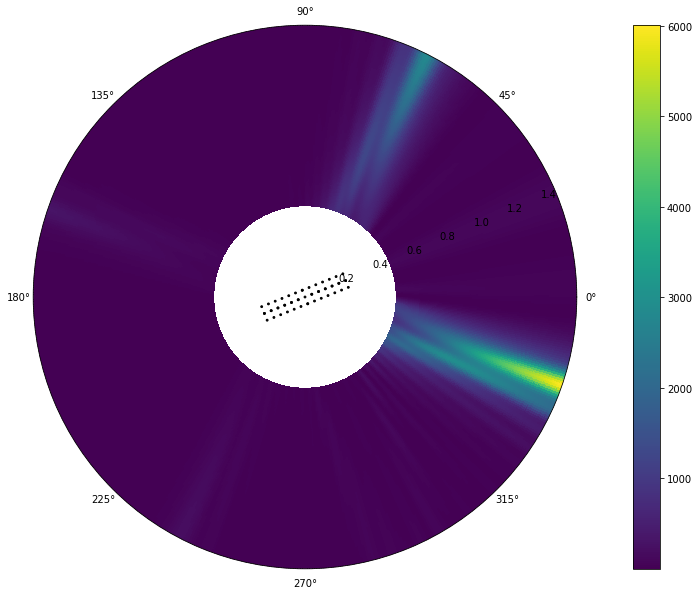

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import numpy as np

fig = plt.figure(figsize=(20,10))
ax1  = plt.subplot(111, polar=True)

#print(len(detectAng))
#print(len(detectR))
#print(len(Eplt))
#print(shape(Eplt))
#pltAng = concatenate((detectAng,-detectAng[-2::-1]))
#pltR = detectR
#print(pltAng)

pltE = []
for i in range(len(Efield)):
    t = Efield[i]
    #tmp = concatenate((t,t[-2::-1]))
    pltE.append(t)
    
pltE = [[abs(e)**2 for e in t] for t in pltE]


#pltAng = concatenate((detectAng,-detectAng[-2::-1]))
pltAng = detectAng

maxV = max(map(max,pltE))
minV = min(map(min,pltE))

p2 = plt.pcolormesh(pltAng, detectR, pltE)#, norm=colors.LogNorm(vmin=minV, vmax=maxV))
#pos = ax1.imshow(pltE, cmap='Blues', interpolation='none')
fig.colorbar(p2,ax=ax1)
#print(Eplt)

braggLine =[0,detectR[-1]]
braggAngle = [pltLine,pltLine]
print(braggAngle)
#plt.plot(braggAngle,braggLine, color='black')
#plt.plot(multiply(braggAngle,.5),braggLine, color='black')


print(shape(r_sp))
print(a)
for s in r_sp:
    #print(s)
    #(angle(s),linalg.norm(s))
    c = plt.Circle((s[1],s[0]),a, transform=ax1.transData._b, color='black')
    ax1.add_artist(c)
#now plot the circles
#plt.grid()

plt.show()